# Example loading .h5 file and plotting precipitation data

## Import libraries

Also set out path so we can import our own functions

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.append(os.path.abspath(".."))

from knmi_precipitation.h5_radar_data import H5RadarData

## Load our example file

In the folder ./example_data we have a file downloaded from KNMI which we load using H5RadarData

In [2]:
data = H5RadarData('../example_data/RAD_NL25_RAC_FM_202409041355.h5')

## Retrieve the image info from the h5 file

The .h5 file contains multiple images ['image1', ...., 'image25'] with encoded dBZ values. We can retrieve the image info using the function get_image_info. In the next example we load this into a dataframe and print the first 5 rows.

In [3]:
image_infos = pd.DataFrame(data.get_image_infos())
print(image_infos.head(5))

      name                  datetime
0   image1 2024-09-04 13:55:00+00:00
1  image10 2024-09-04 14:40:00+00:00
2  image11 2024-09-04 14:45:00+00:00
3  image12 2024-09-04 14:50:00+00:00
4  image13 2024-09-04 14:55:00+00:00


## Get the precipitation data

Now we iterate over all images and retrieve the precipitation data in mm/hr for a given location.

In [4]:
# Hardenberg
lng, lat = 6.568322, 53.219448
precipitation = []

for index, row in image_infos.iterrows():
    value_mm_hr = data.get_mm_hr_from_lon_lat(row['name'], lng, lat)
    precipitation.append({
        'time': row['datetime'],
        'value': value_mm_hr
    })

# order precipitation by time ascending
precipitation = sorted(precipitation, key=lambda x: x['time'])

## Plot the precipitation data

Finally we plot the precipitation data for the location we selected.

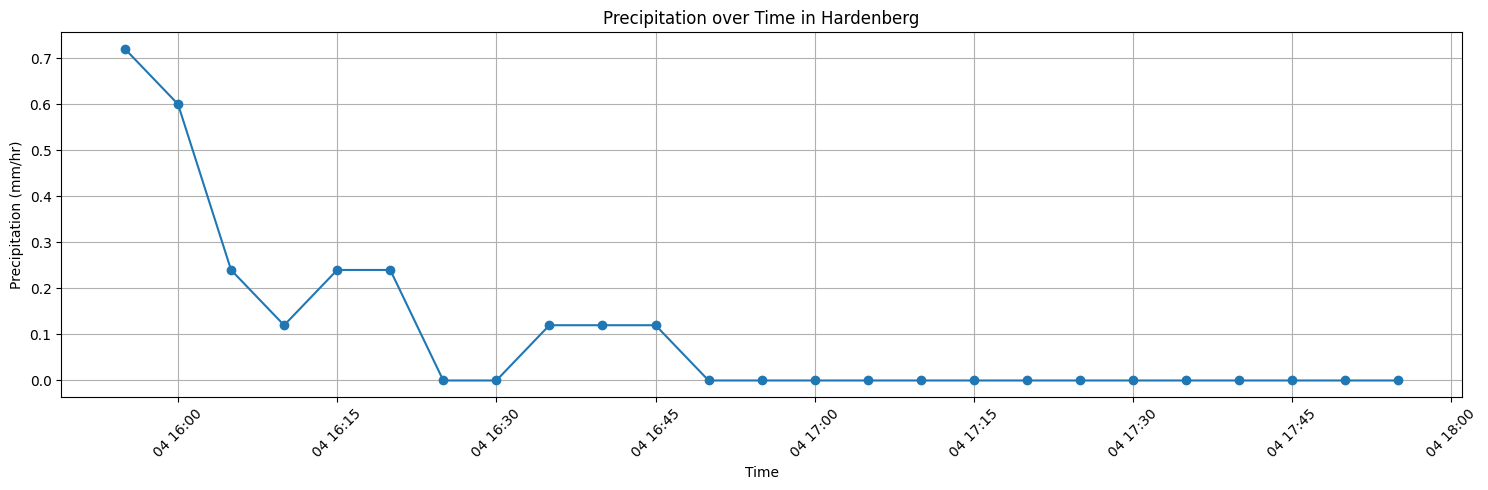

In [5]:
# Step 1: Extract the time and value
times_utc = [entry['time'] for entry in precipitation]
values = [entry['value'] for entry in precipitation]

# Step 2: Convert UTC times to local times
times_utc = pd.to_datetime(times_utc, format='%Y-%m-%dT%H:%M:%SZ')
local_tz_offset = pd.DateOffset(hours=2)
times_local = times_utc + local_tz_offset

# Step 3: Plot the data
plt.figure(figsize=(15, 5))
plt.plot(times_local, values, marker='o')

# Formatting the plot
plt.title('Precipitation over Time in Hardenberg')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm/hr)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()